# WASTE SORTING IN RECYCLING USING MACHINE LEARNING
This project aims to educate on recyclable vs non recyclable materials by classifying normal, day to day waste materials accordingly. Through this, the sorting process in recycling is automated.



# Prerequisites

In [ ]:
#Mount the drive containing the data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Change directory to the folder containing the data.
%cd "/content/drive/MyDrive/CapstoneProject/SORTED DATASET"

/content/drive/MyDrive/CapstoneProject/SORTED DATASET


In [ ]:
#Import the necessary tools/libraries to run our models.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob



# Model Training, Evaluation & Deployment - VGG16

In [ ]:
#Prepare and generate the data. We use image generator to add to the training data/augment.
#Don't add to testing data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, 
                               brightness_range = (0.1, 0.5), horizontal_flip=True)
gen_test = ImageDataGenerator(rescale = 1/255)

#Flow the training images in batches of 32 using the "gen_train" generator
train_data = gen_train.flow_from_directory("/content/drive/MyDrive/CapstoneProject/SORTED DATASET/Train",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")

test_data = gen_test.flow_from_directory("/content/drive/MyDrive/CapstoneProject/SORTED DATASET/Test",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")

Found 508 images belonging to 6 classes.
Found 2031 images belonging to 6 classes.


In [ ]:
#Here, we load the first model - VGG16; pretrained.
#The last fully connected layer is left out because changes will only be made to this layer.
from tensorflow.keras.applications.vgg16 import VGG16

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
#Since the VGG16 weights are already trained, we don't want to train them again.
#Therefore, we make them non-trainable
for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
#We flatten the output layer 
from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)

In [ ]:
#Here, we add the output/prediction layer for classification
vgg_prediction = layers.Dense(units = 6, activation = "softmax")(x)

#Creating a model object
vgg_model = tf.keras.models.Model(inputs = vgg16.input, outputs= vgg_prediction)
vgg_model.summary()

In [ ]:
#Compiling the model
vgg_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

#We build the final model based on the training and testing datasets
#vgg_result = vgg_model.fit_generator(train_data, validation_data=test_data, epochs=10, steps_per_epoch=len(train_data), validation_steps=len(test_data))

In [ ]:
from tensorflow.keras.preprocessing import image
output_class = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = vgg_model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

#This if statement indicates that all waste materials are recyclable except for trash 
  if predicted_value == "trash":
    print("Your waste material is not recylable")
  else:
    print("Your waste material is recylable")

/content/drive/MyDrive/CapstoneProject/SORTED DATASET/Test/Cardboard


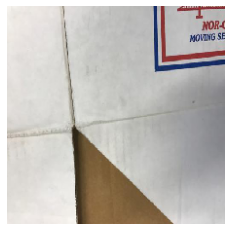

Your waste material is  trash  with  36.31  % accuracy
Your waste material is not recylable


In [ ]:
%cd "/content/drive/MyDrive/CapstoneProject/SORTED DATASET/Test/Cardboard"
waste_prediction("cardboard100.jpg")

In [ ]:
#plot the loss
plt.plot(vgg_result.history['loss'], label = 'train loss')
plt.plot(vgg_result.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the accuracy
plt.plot(vgg_result.history['accuracy'], label = 'train acc')
plt.plot(vgg_result.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Model Training, Evaluation & Deployment - InceptionV3

In [ ]:
#Prepare and generate the data. We use image generator to add to the training data/augment.
#Don't add to testing data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, 
                               brightness_range = (0.1, 0.5), horizontal_flip=True)
gen_test = ImageDataGenerator(rescale = 1/255)

#Flow the training images in batches of 32 using the "gen_train" generator
train_data = gen_train.flow_from_directory("/content/drive/MyDrive/CapstoneProject/SORTED DATASET/Train",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")

test_data = gen_test.flow_from_directory("/content/drive/MyDrive/CapstoneProject/SORTED DATASET/Test",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")

Found 508 images belonging to 6 classes.
Found 2031 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
#Loading the base model

inception = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)

In [ ]:
#Just like VGG16, we only change the last year

for layer in inception.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras import layers

#The output of the model is flattened
y = layers.Flatten()(inception.output)

In [ ]:
#Here, we add the output/prediction layer for classification
inception_prediction = layers.Dense(units = 6, activation="softmax")(y)

# creating the model and show the summary
inception_model = tf.keras.models.Model(inputs = inception.input, outputs=inception_prediction)
inception_model.summary()

In [ ]:
#Compiling the model
inception_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

#inception_result = model.fit_generator(train_data, test_data, epochs = 10, steps_per_epoch=len(train_data))

In [ ]:
from tensorflow.keras.preprocessing import image
output_class = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = inception_model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

#This if statement indicates that all waste materials are recyclable except for trash 
  if predicted_value == "trash":
    print("Your waste material is not recylable")
  else:
    print("Your waste material is recylable")

/content/drive/MyDrive/CapstoneProject/dataset-resized/dataset-resized/trash


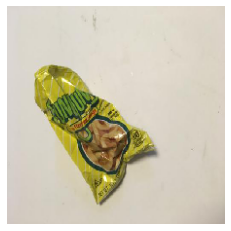

Your waste material is  plastic  with  44.93  % accuracy
Your waste material is recylable


In [ ]:
%cd "/content/drive/MyDrive/CapstoneProject/dataset-resized/dataset-resized/trash"
waste_prediction("trash111.jpg")

In [ ]:
#plot the loss
plt.plot(inception_result.history['loss'], label = 'train loss')
plt.plot(inception_result.history['Val loss'], label = 'Val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the accuracy
plt.plot(inception_result.history['accuracy'], label = 'train acc')
plt.plot(inception_result.history['Val_accuracy'], label = 'Val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')